In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau

##Train

In [2]:
df_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/core/final_proyect/data/train.csv")

In [3]:
#vemos que las emociones ya aparecen codificadas
df_train.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28709 entries, 0 to 28708
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  28709 non-null  int64 
 1   pixels   28709 non-null  object
dtypes: int64(1), object(1)
memory usage: 448.7+ KB


In [5]:
def types(columna):
    sets = set()
    sets.update([type(i) for i in columna])
    return sets

In [6]:
for i in df_train:
    print(f'{i}: {types(df_train[i])}')

emotion: {<class 'int'>}
pixels: {<class 'str'>}


In [7]:
a = df_train["pixels"][0]
a

'70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 92

In [8]:
len(a.split())

2304

In [9]:
#las imagenes son cuadrados, por lo que haciendo su raiz obtenemos
# el numero con el que poder hacer el reshape
len(a.split())**0.5

48.0

In [10]:
#Esta funcion pasa el str al formato que necesitamos para poder continuar
def array(x):
    #creamos una lista con cada valor
    lst = x.split()
    #iteramos sobre cada valor para obtener un entero
    for i in range(len(lst)):
        lst[i] = int(lst[i])
    #convertimos la lista en una matriz de numpy para poder operar
    #al tener 2304 valores, 
    return np.array(lst).reshape(48,48).astype('float32')

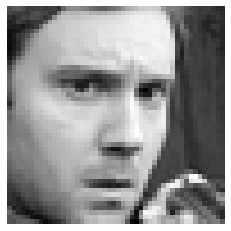

In [11]:
#probamos que la funcion array se ejecuta correctamente
plt.imshow(array(a), cmap="gray")
plt.axis("off");

In [12]:
df_train["pixels"] = df_train["pixels"].apply(array)

In [13]:
types(df_train["pixels"])

{numpy.ndarray}

In [14]:
X_train,y_train = df_train["pixels"] , df_train['emotion']

In [15]:
X_train = np.stack(X_train, axis=0)

In [16]:
print(X_train[0])
print(y_train[0])

[[ 70.  80.  82. ...  52.  43.  41.]
 [ 65.  61.  58. ...  56.  52.  44.]
 [ 50.  43.  54. ...  49.  56.  47.]
 ...
 [ 91.  65.  42. ...  72.  56.  43.]
 [ 77.  82.  79. ... 105.  70.  46.]
 [ 77.  72.  84. ... 106. 109.  82.]]
0


In [17]:
#comprobamos que coinciden los datos
print(y_train.shape)
print(X_train.shape)

(28709,)
(28709, 48, 48)


In [18]:
emotion_label = {0: 'Anger', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

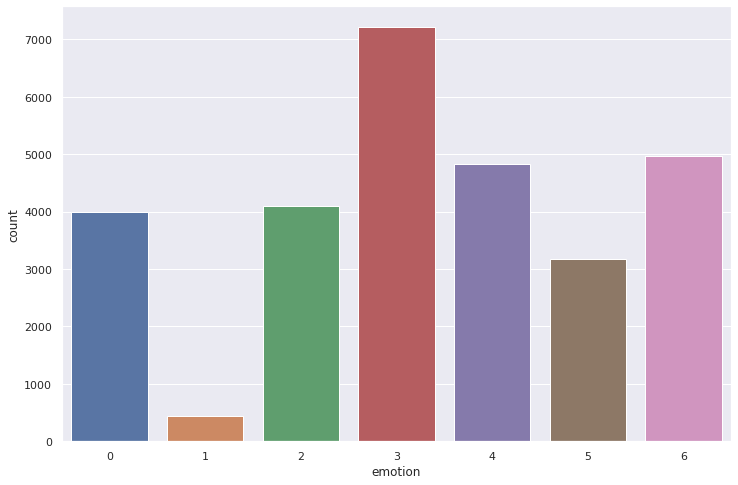

In [19]:
#comprobamos la distribucion de las emociones
sns.set(rc={'figure.figsize':(12,8)})
sns.countplot(x=df_train["emotion"])

In [20]:
le = LabelEncoder()
img_labels_train = le.fit_transform(y_train)
img_labels_train = to_categorical(img_labels_train)
img_labels_train.shape

(28709, 7)

In [21]:
img_labels_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [22]:
y_train = img_labels_train

In [23]:
X_train = X_train/255

In [24]:
X_train[0]

array([[0.27450982, 0.3137255 , 0.32156864, ..., 0.20392157, 0.16862746,
        0.16078432],
       [0.25490198, 0.23921569, 0.22745098, ..., 0.21960784, 0.20392157,
        0.17254902],
       [0.19607843, 0.16862746, 0.21176471, ..., 0.19215687, 0.21960784,
        0.18431373],
       ...,
       [0.35686275, 0.25490198, 0.16470589, ..., 0.28235295, 0.21960784,
        0.16862746],
       [0.3019608 , 0.32156864, 0.30980393, ..., 0.4117647 , 0.27450982,
        0.18039216],
       [0.3019608 , 0.28235295, 0.32941177, ..., 0.41568628, 0.42745098,
        0.32156864]], dtype=float32)

##Test

In [25]:
df_label_test =  pd.read_csv("/content/drive/MyDrive/Colab Notebooks/core/final_proyect/data/icml_face_data.csv")

In [26]:
df_label_test.head()

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [27]:
df_label_test.info

<bound method DataFrame.info of        emotion        Usage                                             pixels
0            0     Training  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1            0     Training  151 150 147 155 148 133 111 140 170 174 182 15...
2            2     Training  231 212 156 164 174 138 161 173 182 200 106 38...
3            4     Training  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4            6     Training  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...        ...          ...                                                ...
35882        6  PrivateTest  50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
35883        3  PrivateTest  178 174 172 173 181 188 191 194 196 199 200 20...
35884        0  PrivateTest  17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
35885        3  PrivateTest  30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...
35886        2  PrivateTest  19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...

[35887 rows x 3 col

In [28]:
df_label_test.columns

Index(['emotion', ' Usage', ' pixels'], dtype='object')

In [29]:
df_label_test[" Usage"].unique()

array(['Training', 'PublicTest', 'PrivateTest'], dtype=object)

In [30]:
emo_test = []
for i in df_label_test.index:
    if df_label_test[" Usage"].iloc[i] != "Training":
        emo_test.append(df_label_test["emotion"].iloc[i])
len(emo_test)

7178

In [31]:
serie_emo_test = pd.Series(emo_test)

In [32]:
serie_emo_test.unique()

array([0, 1, 4, 6, 3, 2, 5])

In [33]:
df_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/core/final_proyect/data/test.csv")

In [34]:
df_test.head()

,pixels
0,254 254 254 254 254 249 255 160 2 58 53 70 77 ...
1,156 184 198 202 204 207 210 212 213 214 215 21...
2,69 118 61 60 96 121 103 87 103 88 70 90 115 12...
3,205 203 236 157 83 158 120 116 94 86 155 180 2...
4,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...


In [35]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7178 entries, 0 to 7177
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   pixels  7178 non-null   object
dtypes: object(1)
memory usage: 56.2+ KB


In [36]:
df_test = df_test.assign(emotion = serie_emo_test)

In [37]:
df_test.head

<bound method NDFrame.head of                                                  pixels  emotion
0     254 254 254 254 254 249 255 160 2 58 53 70 77 ...        0
1     156 184 198 202 204 207 210 212 213 214 215 21...        1
2     69 118 61 60 96 121 103 87 103 88 70 90 115 12...        4
3     205 203 236 157 83 158 120 116 94 86 155 180 2...        6
4     87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...        3
...                                                 ...      ...
7173  50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...        6
7174  178 174 172 173 181 188 191 194 196 199 200 20...        3
7175  17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...        0
7176  30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...        3
7177  19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...        2

[7178 rows x 2 columns]>

In [38]:
df_test = df_test.reindex(columns=['emotion', 'pixels'])


In [39]:
df_test.head()

,emotion,pixels
0,0,254 254 254 254 254 249 255 160 2 58 53 70 77 ...
1,1,156 184 198 202 204 207 210 212 213 214 215 21...
2,4,69 118 61 60 96 121 103 87 103 88 70 90 115 12...
3,6,205 203 236 157 83 158 120 116 94 86 155 180 2...
4,3,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...


In [40]:
for i in df_test:
    print(f'{i}: {types(df_test[i])}')

emotion: {<class 'int'>}
pixels: {<class 'str'>}


In [41]:
p = df_test["pixels"][0]
p

'254 254 254 254 254 249 255 160 2 58 53 70 77 76 75 78 68 18 32 29 0 54 73 75 72 68 75 77 76 76 75 80 51 36 47 40 44 42 37 48 40 64 54 54 86 16 0 161 254 254 254 254 254 248 255 120 2 38 50 47 76 76 83 63 51 142 174 159 88 59 48 67 37 61 46 77 77 75 74 85 19 54 81 73 50 49 53 72 45 41 66 53 70 17 0 122 254 254 254 254 253 253 250 61 17 52 34 34 76 79 68 50 129 235 214 219 226 215 183 116 127 218 93 43 79 80 74 79 57 40 73 30 77 64 49 83 65 38 70 57 72 26 0 114 254 254 254 254 252 255 231 53 17 61 8 2 76 61 21 125 226 207 208 209 206 213 217 226 224 218 214 96 36 67 79 78 51 37 76 7 71 37 51 82 56 59 84 79 82 59 2 74 254 254 254 254 252 255 223 47 16 83 59 54 77 37 127 226 208 211 210 211 212 210 209 207 206 207 216 216 80 24 80 76 64 54 66 3 68 22 58 54 40 83 61 64 65 52 2 96 254 254 254 254 250 255 185 19 25 62 77 80 48 83 228 208 210 213 212 210 211 212 213 213 211 213 208 215 216 88 47 86 69 82 45 18 80 36 38 2 34 53 39 41 40 48 2 124 254 254 254 254 250 255 173 11 30 45 74 75 51 1

In [42]:
len(p.split())

2304

In [43]:
#las imagenes son cuadrados, por lo que haciendo su raiz obtenemos
# el numero con el que poder hacer el reshape
len(p.split())**0.5

48.0

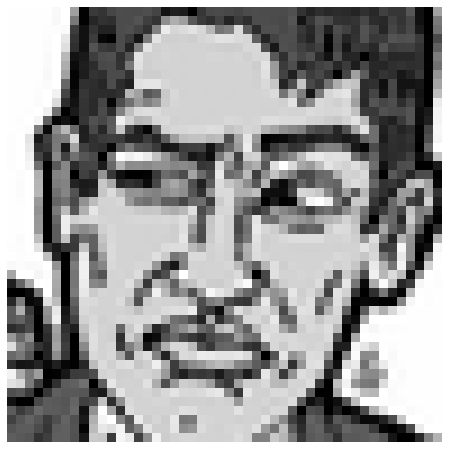

In [44]:
#probamos que la funcion array se ejecuta correctamente
plt.imshow(array(p), cmap="gray")
plt.axis("off");

In [45]:
df_test["pixels"] = df_test["pixels"].apply(array)

In [46]:
types(df_test["pixels"])

{numpy.ndarray}

In [47]:
X_test,y_test = df_test["pixels"] , df_test['emotion']

In [48]:
X_test = np.stack(X_test, axis=0)

In [49]:
print(X_test[0])
print(y_test[0])

[[254. 254. 254. ...  16.   0. 161.]
 [254. 254. 254. ...  17.   0. 122.]
 [254. 254. 254. ...  26.   0. 114.]
 ...
 [ 66.  86.  99. ... 255. 252. 254.]
 [ 84.  92.  92. ... 236. 255. 255.]
 [ 93.  90.  85. ...  42. 129. 180.]]
0


In [50]:
#comprobamos que coinciden los datos
y_test.shape == X_test.shape

False

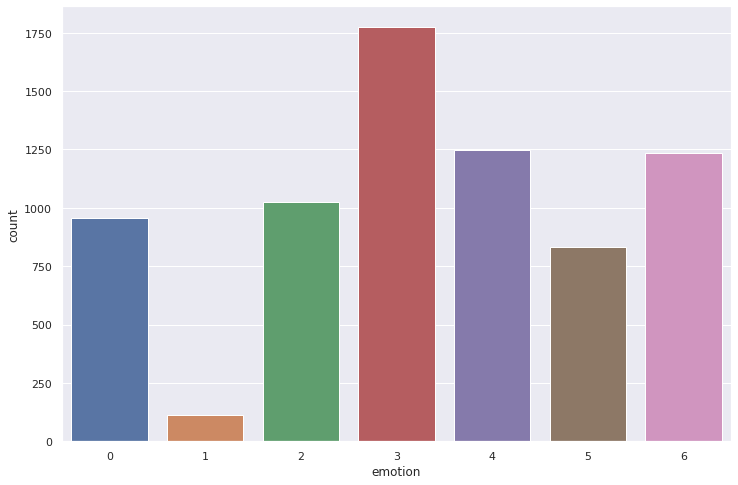

In [51]:
#comprobamos la distribucion de las emociones
sns.set(rc={'figure.figsize':(12,8)})
sns.countplot(x=df_test["emotion"])

In [52]:
le = LabelEncoder()
img_labels_test = le.fit_transform(y_test)
img_labels_test = to_categorical(img_labels_test)
img_labels_test.shape

(7178, 7)

In [53]:
img_labels_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [54]:
y_test = img_labels_test

In [55]:
X_test = X_test/255

In [56]:
X_test[0]

array([[0.99607843, 0.99607843, 0.99607843, ..., 0.0627451 , 0.        ,
        0.6313726 ],
       [0.99607843, 0.99607843, 0.99607843, ..., 0.06666667, 0.        ,
        0.47843137],
       [0.99607843, 0.99607843, 0.99607843, ..., 0.10196079, 0.        ,
        0.44705883],
       ...,
       [0.25882354, 0.3372549 , 0.3882353 , ..., 1.        , 0.9882353 ,
        0.99607843],
       [0.32941177, 0.36078432, 0.36078432, ..., 0.9254902 , 1.        ,
        1.        ],
       [0.3647059 , 0.3529412 , 0.33333334, ..., 0.16470589, 0.5058824 ,
        0.7058824 ]], dtype=float32)

##model

In [57]:
model = Sequential()

model.add(Conv2D(filters = 64,kernel_size = (5, 5),input_shape = (48, 48, 1),activation = 'relu',padding = 'same',kernel_initializer = 'he_normal'))
model.add(BatchNormalization())

model.add(Conv2D(filters = 64,kernel_size = (5, 5),activation = 'relu',padding = 'same',kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 128,kernel_size = (3, 3),activation = 'relu',padding = 'same',kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 128,kernel_size = (3, 3),activation = 'relu',padding = 'same',kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 256,kernel_size = (3, 3),activation = 'relu',padding = 'same',kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 256,kernel_size = (3, 3),activation = 'relu',padding = 'same',kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 512,kernel_size = (3, 3),activation = 'relu',padding = 'same',kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 512,kernel_size = (3, 3),activation = 'relu',padding = 'same',kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))


model.add(Flatten(name='flatten'))       
model.add(Dense(512,activation='relu',kernel_initializer='he_normal',))
model.add(BatchNormalization())   
model.add(Dropout(0.6))
model.add(Dense(7,activation='softmax'))

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        1664      
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        102464    
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                        

In [59]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [60]:
"""from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True) 
lst_accu_stratified = []"""

'from sklearn.model_selection import StratifiedKFold\nskf = StratifiedKFold(n_splits=10, shuffle=True) \nlst_accu_stratified = []'

In [61]:
"""y = img_labels
for train_index, test_index in skf.split(X, y.argmax(1)): 
    X_train_fold, X_test_fold = X[train_index], X[test_index] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    history = model.fit(X_train_fold, y_train_fold,epochs=5,batch_size=32) 
    lst_accu_stratified.append(model.evaluate(X_test_fold, y_test_fold))
    
    plt.show()"""

'y = img_labels\nfor train_index, test_index in skf.split(X, y.argmax(1)): \n    X_train_fold, X_test_fold = X[train_index], X[test_index] \n    y_train_fold, y_test_fold = y[train_index], y[test_index] \n    history = model.fit(X_train_fold, y_train_fold,epochs=5,batch_size=32) \n    lst_accu_stratified.append(model.evaluate(X_test_fold, y_test_fold))\n    \n    plt.show()'

In [62]:
lst_accu_stratified = []

In [63]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32)
lst_accu_stratified.append(model.evaluate(X_test, y_test))
plt.show()

Epoch 1/100
898/898 [==============================] - 30s 29ms/step - loss: 2.0509 - accuracy: 0.2836
Epoch 2/100
898/898 [==============================] - 26s 29ms/step - loss: 1.5117 - accuracy: 0.4230
Epoch 3/100
898/898 [==============================] - 26s 29ms/step - loss: 1.3197 - accuracy: 0.4959
Epoch 4/100
898/898 [==============================] - 26s 28ms/step - loss: 1.2310 - accuracy: 0.5290
Epoch 5/100
898/898 [==============================] - 26s 29ms/step - loss: 1.1665 - accuracy: 0.5615
Epoch 6/100
898/898 [==============================] - 26s 29ms/step - loss: 1.1118 - accuracy: 0.5846
Epoch 7/100
898/898 [==============================] - 26s 29ms/step - loss: 1.0486 - accuracy: 0.6084
Epoch 8/100
898/898 [==============================] - 26s 29ms/step - loss: 1.0210 - accuracy: 0.6201
Epoch 9/100
898/898 [==============================] - 26s 29ms/step - loss: 0.9673 - accuracy: 0.6415
Epoch 10/100
898/898 [==============================] - 26s 29ms/step - l

In [64]:
print(lst_accu_stratified)

[[2.3282110691070557, 0.6483700275421143]]


In [65]:
acc = 0
for i in lst_accu_stratified:
    acc = acc+i[1]
print("Accuracy",acc/len(lst_accu_stratified))

Accuracy 0.6483700275421143


In [66]:
model.save('emo_det.h5')

In [69]:
!ls

drive  emo_det.h5  sample_data


In [71]:
from google.colab import files

In [72]:
files.download('emo_det.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [77]:
#Para convertirlo a tensorflow.js, primero debemos instalar la libreria
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached packaging-20.9-py2.py3-none-any.whl (40 kB)
  Attempting uninstall: packaging
    Found existing installation: packaging 23.0
    Uninstalling packaging-23.0:
      Successfully uninstalled packaging-23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 2022.12.0 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.


In [76]:
!pip install --upgrade packaging


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached packaging-23.0-py3-none-any.whl (42 kB)
  Attempting uninstall: packaging
    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:
      Successfully uninstalled packaging-20.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflowjs 4.2.0 requires packaging~=20.9, but you have packaging 23.0 which is incompatible.
google-cloud-bigquery 3.4.0 requires packaging<22.0.0dev,>=14.3, but you have packaging 23.0 which is incompatible.


In [75]:
!pip install google-cloud-bigquery==3.4.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 KB 16.3 MB/s eta 0:00:00
  Attempting uninstall: google-cloud-bigquery
    Found existing installation: google-cloud-bigquery 3.4.1
    Uninstalling google-cloud-bigquery-3.4.1:
      Successfully uninstalled google-cloud-bigquery-3.4.1


In [78]:
#Crear carpeta donde se colocaran los archivos resultantes
!mkdir carpeta_salida

In [79]:
#Realizar la exportacion a la carpeta de salida
!tensorflowjs_converter --input_format keras emo_det.h5 carpeta_salida

2023-01-12 13:49:44.871495: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-01-12 13:49:44.872237: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-01-12 13:49:44.872265: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


In [80]:
#Confirmar que en la carpeta de salida se hayan generado los archivos. Deben aparecer archivos "bin" y "json"
!ls carpeta_salida

group1-shard1of7.bin  group1-shard4of7.bin  group1-shard7of7.bin
group1-shard2of7.bin  group1-shard5of7.bin  model.json
group1-shard3of7.bin  group1-shard6of7.bin
